# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [151]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [152]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [153]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [154]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [155]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [156]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018383979797363282 (+/- 0.00025226237820787263)
avg score time: 0.0032631874084472655 (+/- 0.00011139281394269919)
avg test score: 0.96 (+/- 0.024944382578492935)


##### 와인 데이터

In [157]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [158]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0022095203399658202 (+/- 8.709318109114108e-05)
avg score time: 0.0039561748504638675 (+/- 0.0008412624560855907)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [159]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01805276870727539 (+/- 0.002408835112339725)
avg score time: 0.007285451889038086 (+/- 0.00012966960319202552)
avg test score: 0.9831746031746033 (+/- 0.02230370548603213)


##### 유방암 데이터

In [160]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [161]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002548694610595703 (+/- 0.0007771262125577299)
avg score time: 0.00790715217590332 (+/- 0.0013512125473633275)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [162]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020573139190673828 (+/- 0.0012169134745068054)
avg score time: 0.014573621749877929 (+/- 0.0003392327389787048)
avg test score: 0.95960254618848 (+/- 0.014207064833668223)


#### SVC

##### 붓꽃 데이터

In [163]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [164]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002129364013671875 (+/- 0.0006539903658311702)
avg score time: 0.0006449222564697266 (+/- 0.0001557092738791282)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [165]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025843429565429687 (+/- 0.002145805567292631)
avg score time: 0.0029398918151855467 (+/- 0.0001837480960657927)
avg test score: 0.9199999999999999 (+/- 0.03399346342395189)


##### 와인 데이터

In [166]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [167]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002321147918701172 (+/- 0.0006880598370347027)
avg score time: 0.0006714344024658203 (+/- 0.00021572306975311672)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [168]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026342058181762697 (+/- 0.0034014949138051614)
avg score time: 0.0031163692474365234 (+/- 0.00010563369163867339)
avg test score: 0.9720634920634922 (+/- 0.02484722784679302)


##### 유방암 데이터

In [169]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [170]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006607341766357422 (+/- 0.0016512486849646936)
avg score time: 0.00162200927734375 (+/- 0.0006109926537446214)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [171]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.036732721328735354 (+/- 0.0013325419307504266)
avg score time: 0.007082414627075195 (+/- 0.0007831724427176617)
avg test score: 0.9613724576929048 (+/- 0.01802638829315946)


#### Decision Tree

##### 붓꽃 데이터

In [172]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [173]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016115188598632812 (+/- 0.00031205804063138344)
avg score time: 0.0005414485931396484 (+/- 9.760298710668505e-05)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [174]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024671506881713868 (+/- 0.00412760030975058)
avg score time: 0.0026164531707763674 (+/- 0.0009397179469354522)
avg test score: 0.9466666666666667 (+/- 0.039999999999999994)


##### 와인 데이터

In [175]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [176]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0020226478576660157 (+/- 0.00038310862983161406)
avg score time: 0.0005552291870117188 (+/- 0.0001815439613032936)
avg test score: 0.8707936507936507 (+/- 0.048796036334988725)


In [177]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023970556259155274 (+/- 0.0029058126545364804)
avg score time: 0.0021966934204101563 (+/- 3.100710389031341e-05)
avg test score: 0.9442857142857143 (+/- 0.039172596485868766)


##### 유방암 데이터

In [178]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [179]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.009243535995483398 (+/- 0.001330244521030967)
avg score time: 0.0006171703338623047 (+/- 4.5243931832908334e-05)
avg test score: 0.9138332557056359 (+/- 0.020589523063254685)


In [180]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03568673133850098 (+/- 0.0031351403059426512)
avg score time: 0.002584362030029297 (+/- 0.0001483303595316465)
avg test score: 0.9525850023288308 (+/- 0.028579030897450827)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [181]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [182]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [183]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015670299530029298 (+/- 0.0006144719925177631)
avg score time: 0.0020230293273925783 (+/- 0.0007191904781070513)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [184]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018323326110839845 (+/- 0.002332249257755499)
avg score time: 0.010486650466918945 (+/- 0.002316911046985)
avg test score: 0.43733370035008035 (+/- 0.07457596195537172)


##### 당뇨병 데이터

In [185]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [186]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014508724212646484 (+/- 0.000529482879101682)
avg score time: 0.002008390426635742 (+/- 0.0005802625755183824)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [187]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018770647048950196 (+/- 0.003414001885677984)
avg score time: 0.009625053405761719 (+/- 0.0007692794617120595)
avg test score: 0.4058180486872941 (+/- 0.04475970285866014)


#### SVR

##### 보스턴 주택 가격 데이터

In [188]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [189]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016412830352783202 (+/- 0.002419625244714199)
avg score time: 0.002497959136962891 (+/- 0.00013776892524663826)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [190]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05217294692993164 (+/- 0.0024318366160692973)
avg score time: 0.009362220764160156 (+/- 0.0014012491808460049)
avg test score: 0.1803011597719138 (+/- 0.2786430215772548)


##### 당뇨병 데이터

In [191]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [192]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.011067914962768554 (+/- 0.0014218942767959097)
avg score time: 0.0020987987518310547 (+/- 0.00028275808227505204)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [193]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.039789676666259766 (+/- 0.0015936590809710427)
avg score time: 0.0069751739501953125 (+/- 0.0001553855661607974)
avg test score: 0.059553751832466986 (+/- 0.04179280769307334)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [194]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [195]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005095195770263672 (+/- 0.0016393912218028537)
avg score time: 0.0007389545440673828 (+/- 7.298889544345396e-05)
avg test score: 0.2895979435180778 (+/- 0.5356262754021325)


In [196]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02994704246520996 (+/- 0.0027949399712445294)
avg score time: 0.002799701690673828 (+/- 0.0005409635788663936)
avg test score: 0.44869641473606114 (+/- 0.3987397835564894)


##### 당뇨병 데이터

In [197]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [198]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004000520706176758 (+/- 0.0010043825453892727)
avg score time: 0.0007976531982421875 (+/- 0.0001823659706211068)
avg test score: -0.130168938449942 (+/- 0.11976605353132884)


In [199]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.027439069747924805 (+/- 0.002374843510934337)
avg score time: 0.0024850845336914064 (+/- 0.00024193710897137547)
avg test score: 0.36471578586103903 (+/- 0.08420429207794422)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [200]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [201]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [202]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12597279548645018 (+/- 0.003663045211019584)
avg score time: 0.008096694946289062 (+/- 0.0005015187487632754)
avg test score: 0.96 (+/- 0.024944382578492935)


In [203]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13460068702697753 (+/- 0.0025540740682588664)
avg score time: 0.0077556133270263675 (+/- 0.00022283731497577686)
avg test score: 0.9609523809523811 (+/- 0.028267341226138717)


In [204]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1901644229888916 (+/- 0.001739044908453289)
avg score time: 0.008482074737548828 (+/- 0.0005865957925776067)
avg test score: 0.95960254618848 (+/- 0.02389947917536689)


### Random Forests 회귀

In [205]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [206]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3085123062133789 (+/- 0.006277774282345476)
avg score time: 0.007404327392578125 (+/- 6.567192047168776e-05)
avg test score: 0.6202683382841866 (+/- 0.22119821942570062)


In [207]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2519063949584961 (+/- 0.006292003387614342)
avg score time: 0.007521152496337891 (+/- 0.000234273400565826)
avg test score: 0.4173889864540664 (+/- 0.054469728353764735)


### Extremely Randomized Trees 분류

In [208]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [209]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08692336082458496 (+/- 0.002550241515649712)
avg score time: 0.0077532768249511715 (+/- 9.576958265780227e-05)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [210]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09773025512695313 (+/- 0.007525495576555089)
avg score time: 0.00913233757019043 (+/- 0.0015439320685955605)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


In [211]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10773496627807617 (+/- 0.003334961857013878)
avg score time: 0.008876562118530273 (+/- 0.00026204581582158653)
avg test score: 0.9701133364384413 (+/- 0.004374511895316699)


### Extremely Randomized Trees 회귀

In [212]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [213]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1807258129119873 (+/- 0.007825404356505397)
avg score time: 0.007981300354003906 (+/- 0.000563103034750865)
avg test score: 0.6218243044862032 (+/- 0.26759931673368276)


In [214]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15214238166809083 (+/- 0.0026695293157399957)
avg score time: 0.008490037918090821 (+/- 0.001403462725965693)
avg test score: 0.43790595692025125 (+/- 0.031515987351102344)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [215]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [291]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 13

In [297]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
         RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

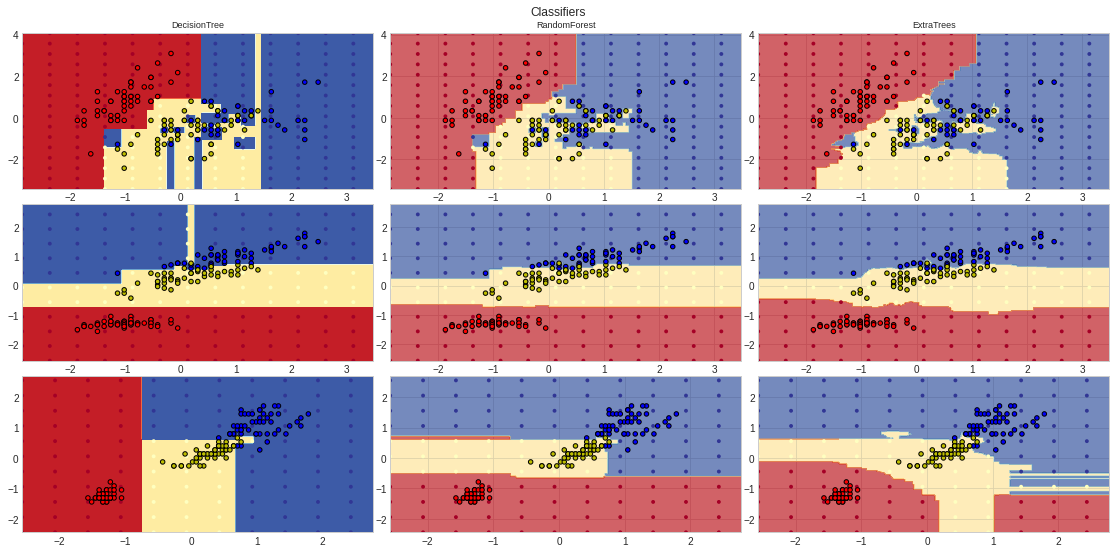

In [293]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show();


In [219]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

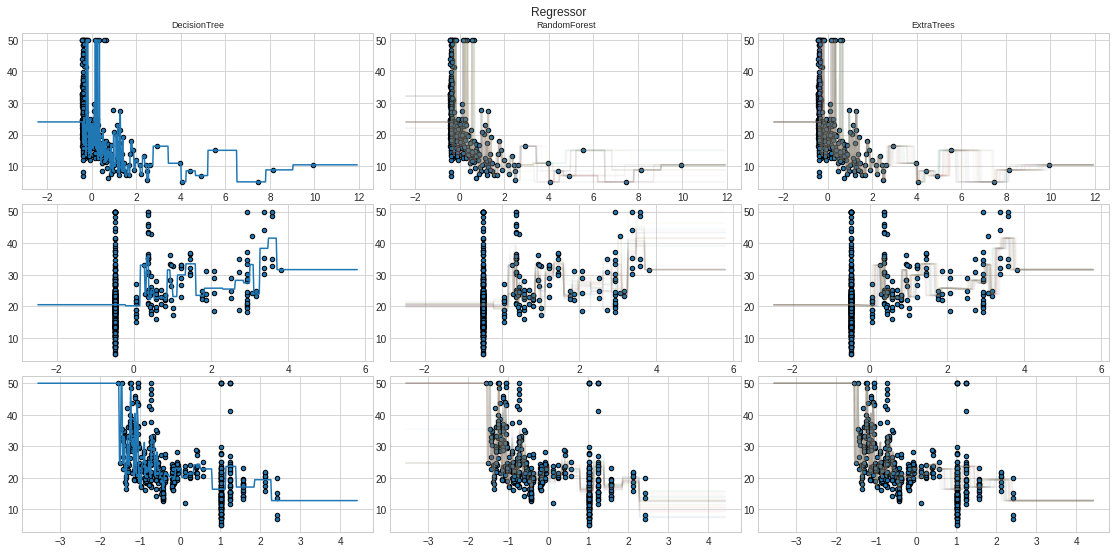

In [220]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):
  for model in models:
    X = boston.data[:,pair]
    y = boston.target

    idx =  np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [221]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [222]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [223]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06793217658996582 (+/- 0.003215449384889244)
avg score time: 0.006765937805175782 (+/- 0.0004707534025038956)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [224]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07645535469055176 (+/- 0.005010000680002422)
avg score time: 0.006656122207641601 (+/- 0.00025372309380205724)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [225]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1544109344482422 (+/- 0.0065291798256544974)
avg score time: 0.008914470672607422 (+/- 0.002725912215517981)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [226]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [227]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09344782829284667 (+/- 0.003694668370080601)
avg score time: 0.0038431644439697265 (+/- 4.8819276633814856e-05)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [228]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08458461761474609 (+/- 0.009552992014469578)
avg score time: 0.003885984420776367 (+/- 0.0003042367181288688)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [230]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [231]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18455662727355956 (+/- 0.014213405212405395)
avg score time: 0.0010142326354980469 (+/- 4.2369604432032996e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [232]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.23187155723571778 (+/- 0.007748070415917388)
avg score time: 0.0010185718536376953 (+/- 4.337001066464193e-05)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [233]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.42436699867248534 (+/- 0.007640653272671787)
avg score time: 0.000987863540649414 (+/- 3.7023142863113423e-05)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [234]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [235]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11781716346740723 (+/- 0.0022256545912577434)
avg score time: 0.001070261001586914 (+/- 0.00016109581894295673)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [236]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09379692077636718 (+/- 0.00535661409787105)
avg score time: 0.0009908676147460938 (+/- 1.414286471290068e-05)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [237]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [238]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2),('forest',model3)],
    voting='hard'
)

In [239]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [240]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [241]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [243]:
X = iris.data[:, [0,2]]
y = iris.target

In [244]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt',model1),('knn',model2),('svc',model3)], 
                              voting='soft', weights=[2,1,2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [245]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

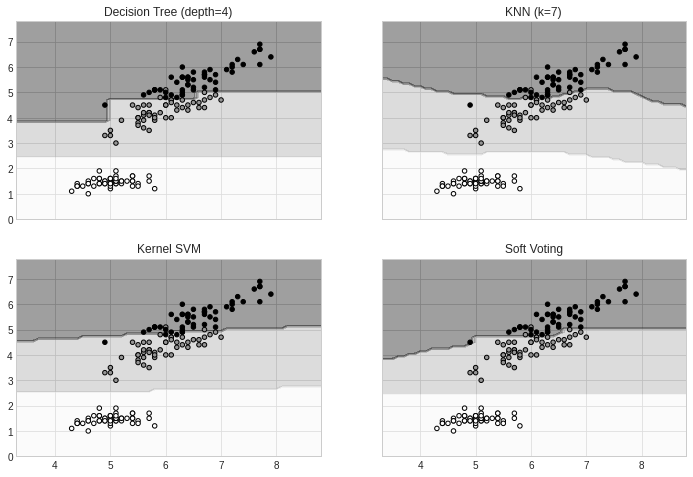

In [248]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, vote_model],
                       ['Decision Tree (depth=4)', 'KNN (k=7)',
                        'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [250]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1),('gbr',model2),('rfr',model3)],
    weights=[1,1,1]
)

In [251]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [252]:
X = boston.data[:,0].reshape(-1, 1)
y = boston.target

In [253]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1),('gbr',model2),('rfr',model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [255]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, .1)

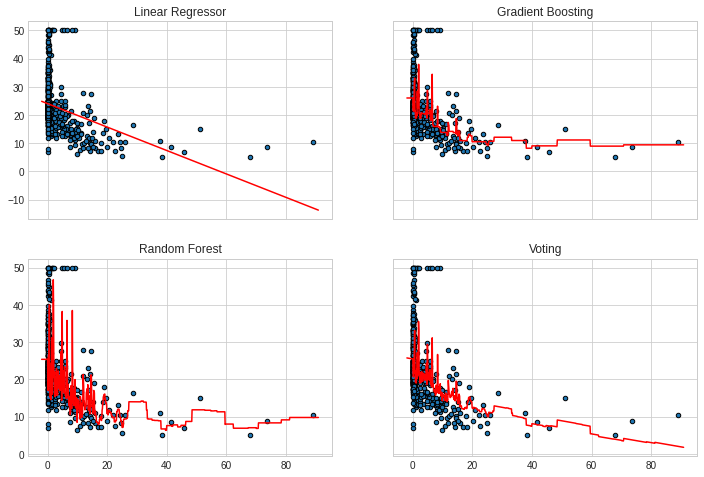

In [256]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressor', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [257]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [258]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [260]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [261]:
cross_val = cross_validate(
    estimator = reg,
    X = boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1468796730041504 (+/- 0.006962264244553339)
avg score time: 0.0029694557189941405 (+/- 0.00013694298292679695)
avg test score: 0.3193125598078287 (+/- 0.3328757426063098)


#### 회귀식 시각화

In [262]:
X = boston.data[:,0].reshape(-1, 1)
y = boston.target

In [263]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

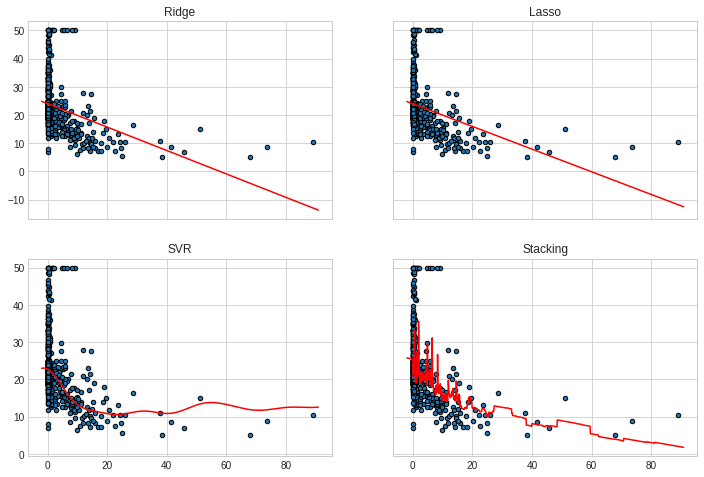

In [264]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stacking']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [272]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc',SVC()),
               ('naive', GaussianNB())]

In [273]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator=RandomForestClassifier()
)

In [274]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.28801751136779785 (+/- 0.008493336734236842)
avg score time: 0.0083038330078125 (+/- 3.0119882513017367e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 결정 경계 시각화

In [280]:
X = iris.data[:, [0,2]]
y = iris.target

In [281]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [282]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

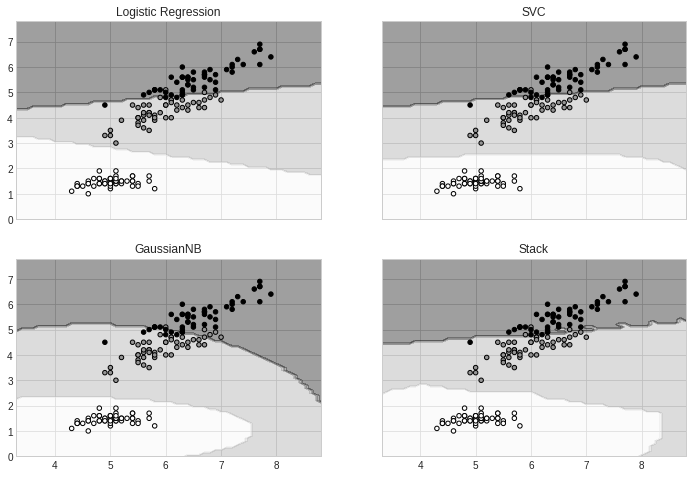

In [283]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, stack],
                       ['Logistic Regression', 'SVC',
                        'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()